## Basic linear regression
### Crash course in TensorFlow
###### by Stephan Baggeröhr
#### 1) Import functions

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### 2) Generate Data

In [28]:
x_data =  np.linspace(0,10,num=10)
A_data = 47.0
b_data = -10.0

y_data = A_data*x_data + b_data
y_data += np.random.normal(scale=50.0,size=y_data.size)

#### 3) Visualize data

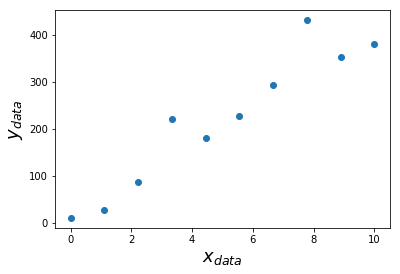

In [29]:
plt.scatter(x_data,y_data)
plt.xlabel('$x_{data}$',fontsize=18)
plt.ylabel('$y_{data}$',fontsize=18)
plt.show()

#### 4) Build TensorFlow Graph
* Placeholder --> Variables which will be passed data when session is run
* Variable --> Trainable variable that can be ubdated by optimizer

In [39]:
#Define variables
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
A = tf.Variable(0,dtype=tf.float32)
b = tf.Variable(0,dtype=tf.float32)

#Define dependencies
Y_pred = A*X + b

#Create loss function
loss = tf.norm(Y-Y_pred)

#Create Optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = opt.minimize(loss)

#### 5) Create session and run Graph
* Don't forget to initialize all variables

Loss = 0 at step 826.8741455078125


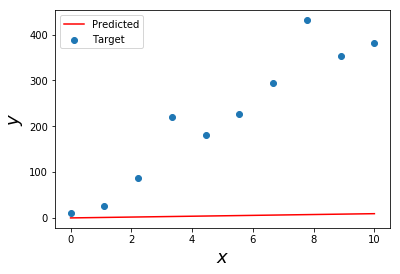

Loss = 20 at step 484.6649475097656


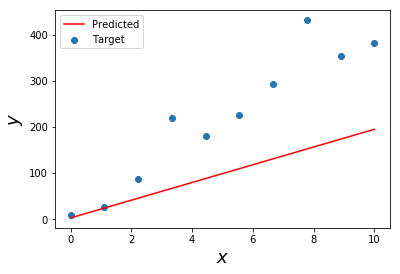

Loss = 40 at step 199.54710388183594


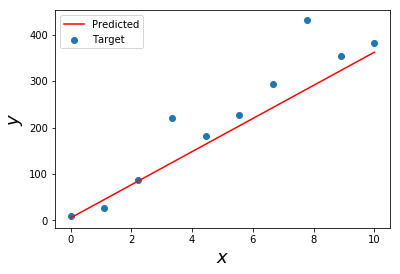

Loss = 60 at step 138.06521606445312


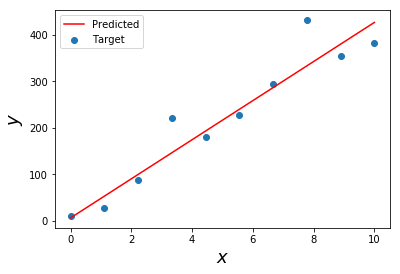

Loss = 80 at step 137.5397491455078


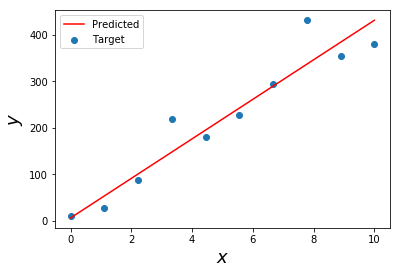

Final gradient; A = 42.519100189208984, and offset; b = 6.626286029815674
Actual gradient; A = 47.0, and offset; b = -10.0


In [40]:
sess = tf.Session() #Define the session
init = tf.global_variables_initializer() #Initialize variables
sess.run(init)
for i in range(100):
    feed_dict = {X:x_data,Y:y_data} #Feed in training data
    _,loss_,A_,b_ = sess.run([train_op,loss,A,b],feed_dict=feed_dict) #run training optimizer and return loss and trained variable (A.b)
    if i%20 == 0:
        #Plot training progress
        print("Loss = {} at step {}".format(i,loss_))
        Y_plot = A_*x_data + b_
        plt.figure(1)
        plt.clf()
        plt.scatter(x_data,y_data)
        plt.plot(x_data,Y_plot,'r-')
        plt.xlabel('$x$',fontsize=18)
        plt.ylabel('$y$',fontsize=18)
        plt.legend(['Predicted','Target'])
        plt.show()
        
print("Final gradient; A = {}, and offset; b = {}".format(A_,b_))
print("Actual gradient; A = {}, and offset; b = {}".format(A_data,b_data))